# Diagnose Problem: `sum of cover_fract_pot /= 1`

This notebook gives you a graphical representation of the `cover_fract` variable in a `jsbach.nc` input file.

In [30]:
import xarray as xr
import hvplot.xarray
jsbach_input_file = "/albedo/work/user/pgierz/SciComp/Model-Support/AWI-ESM/common-errors/jsbach-cover-fract/eocene_1x_bootstrap/run_20010101-20011231/work/jsbach.nc"

/albedo/soft/sw/conda-sw/analysis-toolbox/07.2024/lib/python3.9/site-packages/xarray/coding/times.py:170: SerializationWarning: Ambiguous reference date string: 1-1-1. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/albedo/soft/sw/conda-sw/analysis-toolbox/07.2024/lib/python3.9/site-packages/xarray/coding/times.py:995: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/albedo/soft/sw/conda-sw/analysis-toolbox/07.2024/lib/python3.9/site-packages/xarray/core/indexing.py:630: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, co

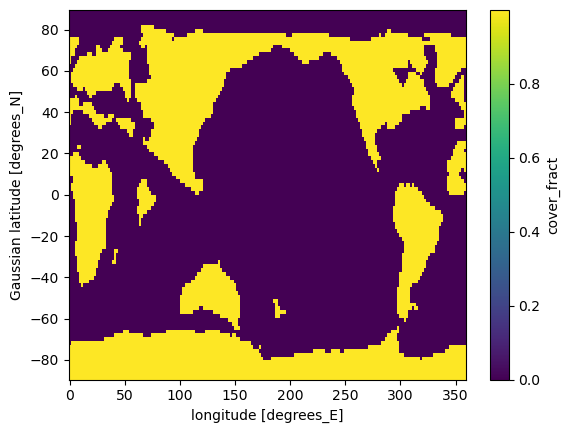

In [31]:
ds = xr.open_dataset(jsbach_input_file)
ds.cover_fract.sum(dim="ntiles").plot(x="lon", y="lat")

That already looks good, but we want to identify cells that are not either `1` or `0`. To do that, we can use the following:

In [32]:
safe_values = [0.0, 1.0]
summed_cover_fract = ds.cover_fract.sum(dim="ntiles")
# Create a boolean mask where values in the DataArray are in the exclude list
mask = summed_cover_fract.isin(safe_values)

# Negate the mask to get True for values not in the list
not_in_list_mask = ~mask

# Use the mask to filter values
filtered_data = summed_cover_fract.where(not_in_list_mask, drop=True)

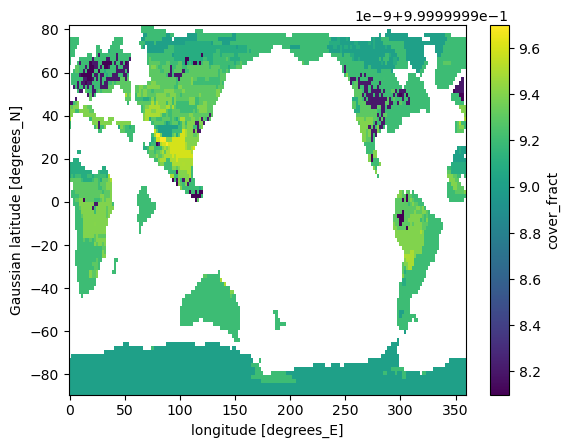

In [33]:
filtered_data.plot(x="lon", y="lat")